# (ProsperLoanData)
## by (Shekhah Abdulrhman)

## Investigation Overview

> For the presentation, I just focus the main variable of interest which is  loan’s outcome status and  features that could affect the borrower APR which is the Loan Original Amount.
I started by showing the distribution of borrower APR and loan amount variable. Then, I showed the relationship between APR .
I also investigated what will have the strongest effect on LoanStatus.


## Dataset Overview

There are 11,3937 loan in the dataset with 81 features,Most variables are numeric in nature.

I selected top_variables of intrest and, I perfomed data Cleaning Imputing missing values, then i statred with explorering categorical varibles, then  Numeric varibles.

In [2]:
## Import libraries

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe, print statistics

loandf = pd.read_csv('prosperLoanData.csv')
loandf.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# high-level overview of data shape and composition
# The first step is to discover what type of variables we’re dealing with 

print(loandf.shape)
print(loandf.dtypes)
print(loandf.head(81))
 # Shows data types for each column
loandf.info()

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                 ListingKey  ListingNumber            ListingCreationDate  \
0   1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1   10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2   0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3   0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4   0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
..                      ...            ...                            


### What is/are the main feature(s) of interest in your dataset?

I'm  interested in figuring out What factors affect a loan’s outcome status in the dataset.

and also to explore what most catogry funded by the investors 

What affects the borrower’s APR or interest rate?

Are there differences between loans depending on how large the original loan amount was?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the income range and StatedMonthlyIncome will have the strongest effect on LoanStatus
and the larger the income range , the lager  LoanOriginalAmount.
I also think that the more LoanOriginalAmount more "APR".



I'll start by looking at the main variable of interest:  loan’s outcome status.

## (Visualization 1)
I'll start by looking at the main variable of interest:  loan’s outcome status.

In [5]:
loanstatus_ordered = ["Current", "Completed", "Chargedoff", "Past Due (1-15 days)", "Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)",
                      "Past Due (16-30 days)", "FinalPaymentInProgress", "Past Due (>120 days)","Cancelld"]

In [6]:
loandf['Loan Status'] = pd.Categorical(loandf['LoanStatus'], categories=loanstatus_ordered, ordered=True)

Loan Status:
We can see from the bar chart the most current loans are with 50,000 and the completed is with less 40,000. 


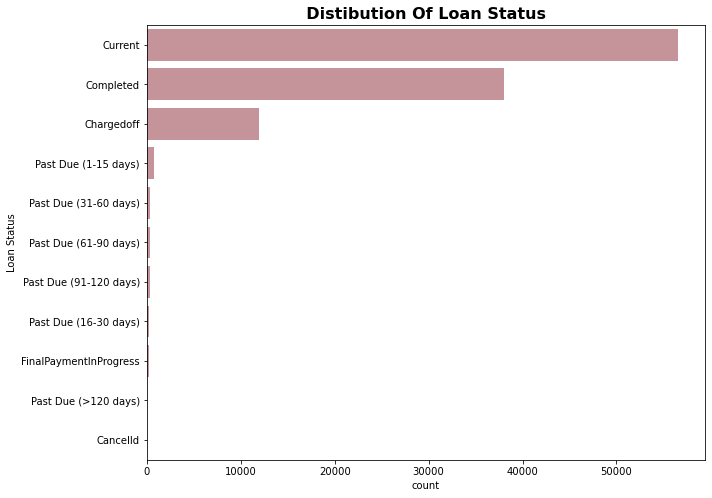

In [7]:
# Plot the Loans Status on a Horizontal bar chart
plt.figure(figsize=[10,8])
cat_order = loandf['Loan Status'].value_counts().index
sns.countplot(data=loandf, y='Loan Status', order=cat_order , color='#CD8C95');
plt.title('  Distibution of Loan Status  '.title(),fontsize = 16, weight = "bold");

In [8]:
#we can fill NAN with “zero”
col = ("BorrowerAPR", "EmploymentStatus", "AmountDelinquent" ,"EmploymentStatusDuration")


for i in col:
     
     loandf[i] = loandf[i].fillna(0) 

In [9]:
loandf.rename(columns={"ListingCategory (numeric)":"ListingCategory"},inplace = True)


## (Visualization 2)


In [10]:
# Convert Employment status into ordered categorical types
Emp_Stat = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = Emp_Stat)
loandf['EmploymentStatus'] = loandf['EmploymentStatus'].astype(ordered_var)

In [11]:
Emp_Stat = ["Employed","Self-employed","Full-time","Part-time","Retired","Other","Not employed", "Not available"]
loandf['EmploymentStatus'] = pd.Categorical(loandf['EmploymentStatus'], categories=Emp_Stat, ordered=True)
loandf['EmploymentStatus'] = loandf['EmploymentStatus'].astype(ordered_var)

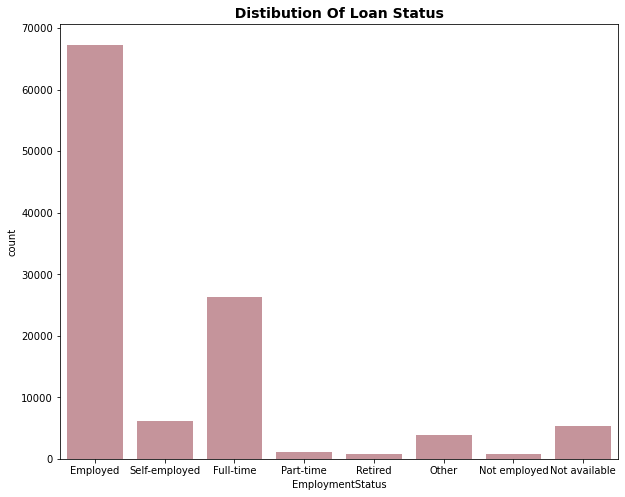

In [12]:
plt.figure(figsize=[10,8])
sns.countplot(data = loandf, x = 'EmploymentStatus',color = '#CD8C95');
plt.title('  Distibution of Loan Status  '.title(),fontsize = 14, weight = "bold");

#### And The largest amount of borrowers are employed and full-time.

## (Visualization 3)


The next bar chars will show that after the ‘Others’, the top occupations counts are  
 - Professional 
 - computer programme
 - Executives and Teacher .

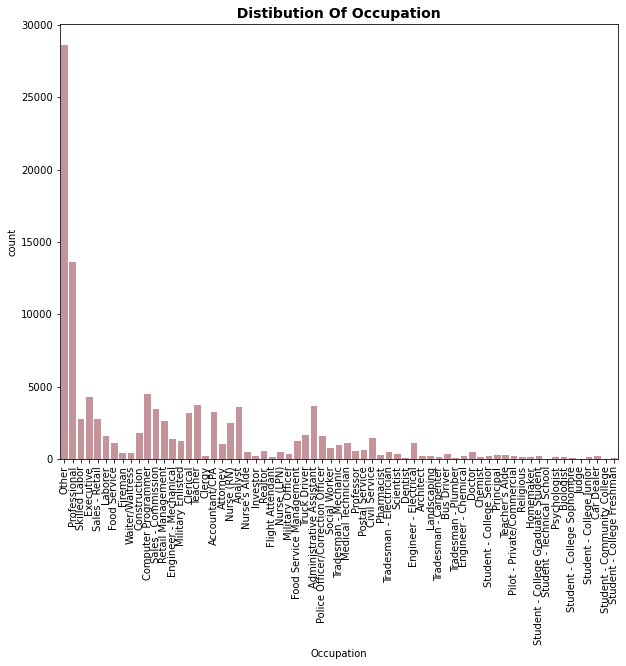

In [13]:
plt.figure(figsize=[10,8])
sns.countplot(data = loandf, x = 'Occupation',color = '#CD8C95');
plt.title('  Distibution of Occupation  '.title(),fontsize = 14, weight = "bold");
plt.xticks(rotation=90);

## (Visualization 4)


# The Next barplot, That the most loans offered byProsper are Debt Consolidation,Home Improvement.

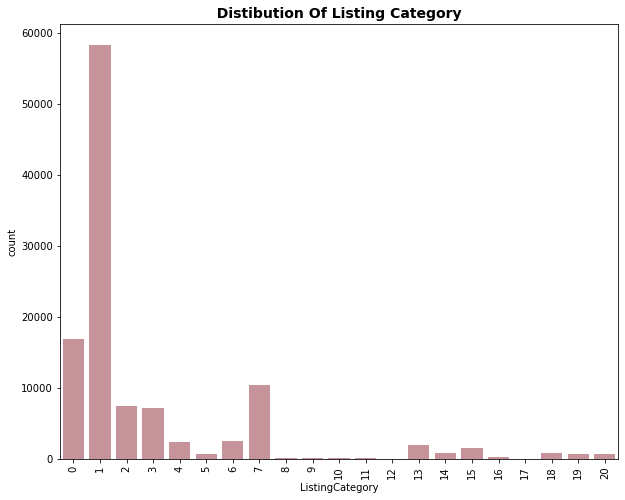

In [14]:
# Plot the loandf ListingCategory on a Vertical bar chart
plt.figure(figsize=[10,8])
plt.title('  Distibution of Listing Category  '.title(),fontsize = 14, weight = "bold");
sns.countplot(data=loandf, x='ListingCategory', color='#CD8C95' );
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

## (Visualization 5)

The next visualizations will show that there doesn't seem to be that much interaction between Loan Status  and Employment Status,and the most current loans are with the Employed.
There are slightly larger interactions on if Borrower Homeowner, especially on current and completed loans.
And for the Income Range, it appears there is much interaction with LoanStatus.


In [15]:
#function for titles
def titleLabel(title,xLabel,yLabel):
    
 plt.title(title.title(),fontsize=13,weight="bold"); 
 plt.xlabel(xLabel.title(),fontsize=13 ,weight="bold") ;
 plt.ylabel(yLabel.title(),fontsize=13 ,weight="bold");

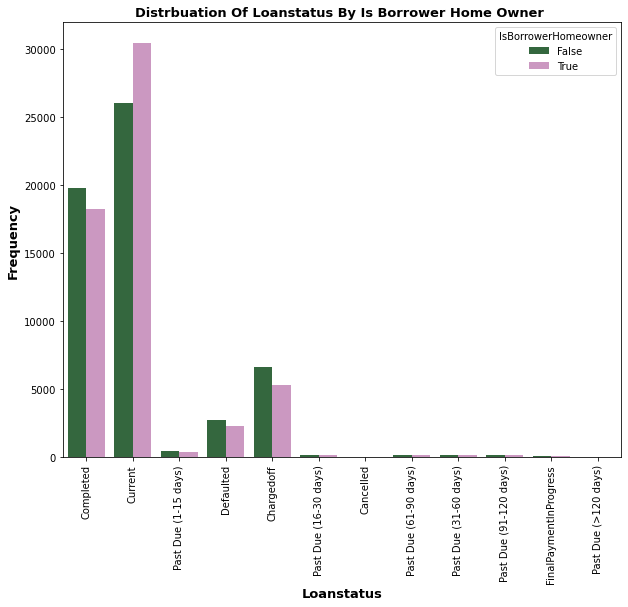

In [16]:
plt.figure(figsize=[10,8])
plt.xticks(rotation=90);
sns.countplot(data = loandf, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'cubehelix')
titleLabel('Distrbuation of LoanStatus by Is Borrower Home owner ','LoanStatus','Frequency',)

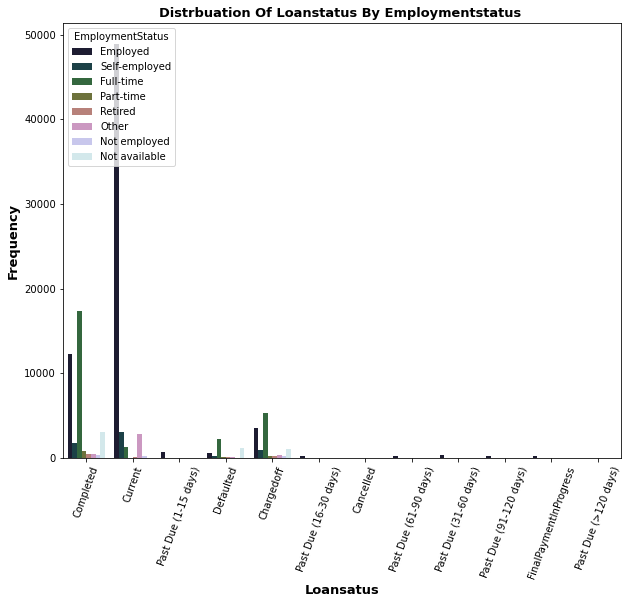

In [17]:
plt.figure(figsize=[10,8])
sns.countplot(data = loandf, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'cubehelix')
plt.xticks(rotation=70);
titleLabel('Distrbuation of LoanStatus by EmploymentStatus ','loansatus','Frequency')

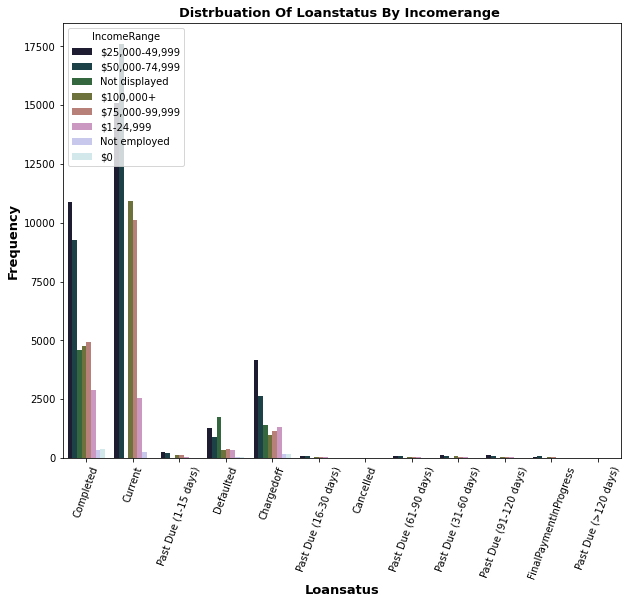

In [18]:
plt.figure(figsize=[10,8])
sns.countplot(data = loandf, x = 'LoanStatus', hue = 'IncomeRange', palette = 'cubehelix')
plt.xticks(rotation=70);
titleLabel('Distrbuation of LoanStatus by IncomeRange ','loansatus','Frequency')

## (Visualization 6)

##### The Next Chart will show the Distibution of Amount Delinquent by Loan Original Amount & APR, and It seems there is a intraction between the Amount of Delinquent and the increse of APR with less loan amount .

In [ ]:
plt.figure(figsize = [10, 8])
titleLabel('  Distibution of Amount Delinquent by Loan Original Amount & APR','LoanOriginalAmount ','BorrowerAPR');
plt.scatter(data=loandf,x='AmountDelinquent',y='BorrowerAPR',c='LoanOriginalAmount',cmap='mako_r');
plt.colorbar();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!